# _`automaton`_`.compose`

The (accessible part of the) composition of two transducers ($A_1$ and $A_2$).

Preconditions:
- $A_1$ and $A_2$ are transducers
- $A_1$ has at least 2 tapes
- The second tape of $A_1$ must have the same labelset as the first tape of $A_2$

Postconditions:
- $\forall u \in alphabet(A_1)^*, \; A_2.eval(A_1.eval(u)) = A_1.compose(A_2).eval(u)$

## Examples

In [5]:
import vcsn
ctx1 = vcsn.context("lat<lal<char(ab)>, lal<char(jk)>>, b")
ctx2 = vcsn.context("lat<lal<char(jk)>, lal<char(xy)>>, b")

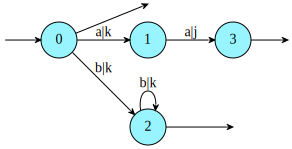

In [6]:
a1 = ctx1.expression("(a|k)(a|j) + (b|k)*").automaton()
a1

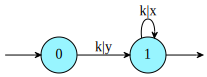

In [7]:
a2 = ctx2.expression("(k|y)(k|x)*").automaton()
a2

The result of the composition has a useless state. Note that only the accessible part has been computed.

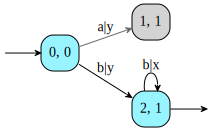

In [8]:
a1.compose(a2)

### Translations
The composition of a "_translator_" from French to English with one from English to Spanish is analogous to the computation of the French to Spanish "_translator_".

In [9]:
%%file fr2en
chien|dot
chat|cat

Overwriting fr2en


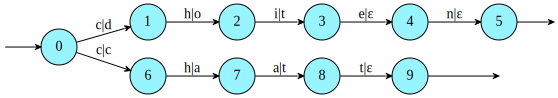

In [10]:
ctx = vcsn.context("lat<lan<char>, lan<char>>, b")
fr_to_en = ctx.trie('fr2en')
fr_to_en

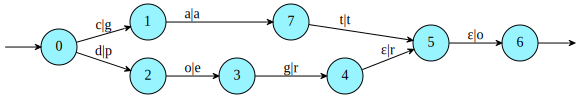

In [11]:
en_to_es = ctx.expression("dog|perro + cat|gato").automaton()
en_to_es

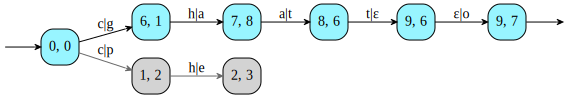

In [12]:
fr_to_es = fr_to_en.compose(en_to_es)
fr_to_es

### Relying on "string-letters"
This example follows the same path, but using letters that are strings.

In [13]:
import vcsn
ctx = vcsn.context("lat<lan<string>, lan<string>>, b")
ctx

lat<nullableset<letterset<string_letters()>>, nullableset<letterset<string_letters()>>>, b

In [14]:
%%file fr2en
'chien'|'dog'
'chat'|'cat'
'oiseau'|'bird'
'souris'|'mouse'
'souris'|'mice'

Overwriting fr2en


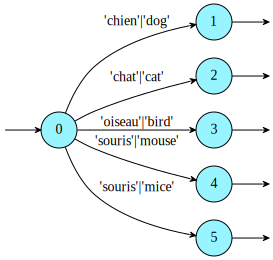

In [15]:
fr2en = ctx.trie('fr2en')
fr2en

In [16]:
%%file en2es
'dog'|'perro'
'cat'|'gato'
'mouse'|'ratón'
'mice'|'ratones'

Overwriting en2es


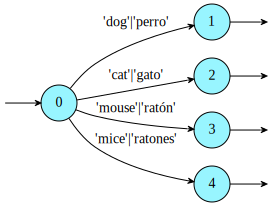

In [17]:
en2es = ctx.trie('en2es')
en2es

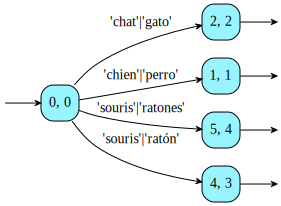

In [18]:
fr2en.compose(en2es)